In [10]:
import pandas as pd
import matplotlib.pyplot as mpt
import seaborn as sb

In [11]:
data=pd.read_csv("train.csv")

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
sb.set()

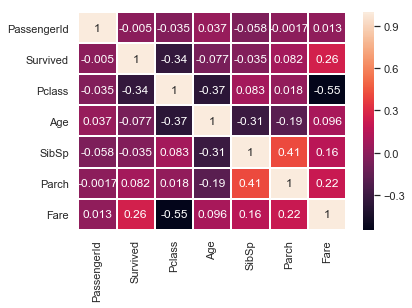

In [15]:
sb.heatmap(data.corr(), annot=True, linewidth = 1, linecolor='w')

In [16]:
data.shape

(891, 12)

In [17]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
class_survival=data.groupby("Pclass")["Survived"].value_counts()

In [20]:
class_survival

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

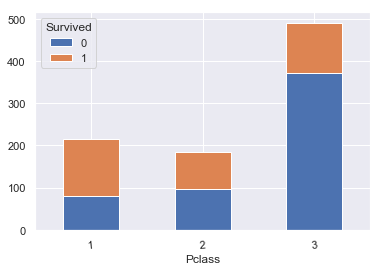

In [128]:
class_survival.unstack().plot(kind="bar",stacked=True)
mpt.xticks(rotation=5)

# Using crossby in Pclass vs Survival

In [31]:
pclass_data=pd.crosstab(data["Pclass"],data["Survived"])

In [32]:
pclass_data

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


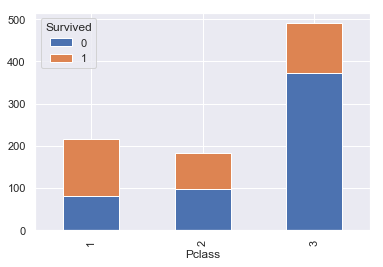

In [40]:
pclass_data.plot(kind="bar",stacked=True)

In [41]:
pclass_data["total"]=pclass_data.sum(axis=1)

In [42]:
pclass_data=pclass_data.apply(lambda x : round(100*x/pclass_data["total"]))

In [43]:
pclass_data

Survived,0,1,total
Pclass,,,
1,37.0,63.0,100.0
2,53.0,47.0,100.0
3,76.0,24.0,100.0


In [44]:
pclass_data.drop("total",axis=1,inplace=True)

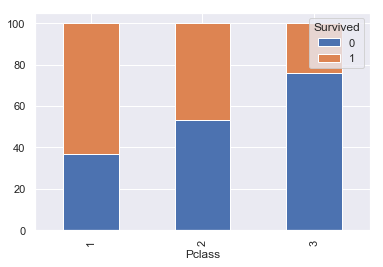

In [45]:
pclass_data.plot(kind="bar",stacked=True)

# Predicting data

In [46]:
training_data=data[["PassengerId","Pclass","Fare"]]

In [47]:
output_data=data["Survived"]

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
X,x_test,Y,y_test=train_test_split(training_data,output_data,test_size=0.3,random_state=42)

# X,Y are training i/p and o/p and x,y are evaluating i/p o/p
#test_size is 30%, meaning 70trainig, 30 test,can be 80-20, but not half
#random is shuffle values

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression()

In [56]:
model.fit(X,Y)

C:\Users\Sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
predictions=model.predict(x_test)

In [58]:
predictions[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [60]:
confusion_matrix(predictions,y_test)

array([[134,  58],
       [ 23,  53]], dtype=int64)

In [61]:

#the above cell implies that 134 and 53 predictions are correct rest are wrong

In [63]:
score=accuracy_score(predictions,y_test)

In [64]:
score

0.6977611940298507

In [65]:
 #this means approx 70% of the predicyions are correct

# converting gender option into boolean

In [66]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
def conveter(x):
    if(x=="female"):
        return 0
    else:
        return 1

In [68]:
data["Gender"]=data["Sex"].apply(conveter)

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [70]:
data[["Sex","Gender"]].head()

,Sex,Gender
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [71]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Gender'],
      dtype='object')

# Prediction chances of survival on the basis of gender of person

In [73]:
data2=data[["PassengerId","Pclass","Fare","Gender"]]

In [74]:
data2.head()

,PassengerId,Pclass,Fare,Gender
0,1,3,7.2500,1
1,2,1,71.2833,0
2,3,3,7.9250,0
3,4,1,53.1000,0
4,5,3,8.0500,1


In [75]:
output2=data["Survived"]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X ,x_test,Y ,y_test = train_test_split(data2,output2,test_size=0.3,random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model2=LogisticRegression()

In [80]:
model2.fit(X,Y)

C:\Users\Sahil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [81]:
prediction2=model2.predict(x_test)

In [83]:
prediction2[:15]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [88]:
confusion_matrix(prediction2,y_test)

array([[133,  33],
       [ 24,  78]], dtype=int64)

In [89]:
score=accuracy_score(prediction2,y_test)

In [90]:
score

0.7873134328358209

# Test Data File

In [91]:
test_data=pd.read_csv("test.csv")

In [92]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
test_data=test_data[["PassengerId","Pclass","Fare"]]

In [95]:
test_data["Fare"]=test_data["Fare"].fillna(test_data["Fare"].mean())

In [97]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [98]:
test_predictions=model.predict(test_data)

In [100]:
test_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [102]:
test_submission={"PassengerId":test_data["PassengerId"],"Survived":test_predictions}

In [104]:
test_submission=pd.DataFrame(test_submission)

In [106]:
test_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [107]:
test_submission=test_submission.set_index("PassengerId")

In [109]:
test_submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [110]:
test_submission.to_csv("Submission.csv")

#Logistic Regression-Columns-PassengerId,Fare,Pclass

# Based on Gender -test data

In [111]:
def convert(x):
    if(x=="male"):
        return 1
    else:
        return 0

In [112]:
test_data2=pd.read_csv("test.csv")

In [113]:
test_data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [114]:
test_data2["Gender"]=test_data2["Sex"].apply(convert)

In [115]:
test_data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [116]:
test_data2=test_data2[["PassengerId","Pclass","Fare","Gender"]]

In [117]:
test_data2["Fare"]=test_data2["Fare"].fillna(test_data2["Fare"].mean())

In [118]:
test_data2.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
Gender         0
dtype: int64

In [119]:
test_prediction2=model2.predict(test_data2)

In [120]:
test_prediction2[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [122]:
test_submission2={"PassengerId":test_data2["PassengerId"],"Survived":test_prediction2}

In [123]:
test_submission=pd.DataFrame(test_submission2)

In [124]:
test_submission2=test_submission.set_index("PassengerId")

In [125]:
test_submission2.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [126]:
test_submission2.to_csv("submission_with_gender")